In [1]:
from collections import namedtuple
import sympy
from sympy import Matrix, det, symbols, sin, cos, pi
import IPython.display

In [2]:
sympy.init_printing(use_unicode=True)

In [3]:
TrackingWheelCfg = namedtuple('TrackingWheelCfg', ['v', 'theta_rad', 'radius_meters'])

In [4]:
e_x = Matrix([[1],[0]])
e_y = Matrix([[0],[1]])

In [5]:
def xfactor(r, theta):
    return (r * cos(theta))

def yfactor(r, theta):
    return  (r * sin(theta))


def ofactor(r, v: Matrix, d: Matrix):
    rotMat = Matrix([[0, -1], [1, 0]])
    f_o = r * (d.dot(rotMat * v) ) / (v.norm() * v.norm())
    return f_o

def factors(cfg: TrackingWheelCfg):
    x = xfactor(cfg.radius_meters, cfg.theta_rad)
    y = yfactor(cfg.radius_meters, cfg.theta_rad)
    d = Matrix([[cos(cfg.theta_rad)], [sin(cfg.theta_rad)]])
    o = ofactor(cfg.radius_meters, cfg.v, d)
    return (x, y, o)
    # return [1 / symbols(f'f_x{i}'), 1 / symbols(f'f_y{i}'), 1/ symbols(f'f_o{i}')]

In [6]:
def Factors(cfg: TrackingWheelCfg):
    x = 1 / xfactor(cfg.radius_meters, cfg.theta_rad)
    y = 1 / yfactor(cfg.radius_meters, cfg.theta_rad)
    d = Matrix([[cos(cfg.theta_rad)], [sin(cfg.theta_rad)]])
    o = 1 / ofactor(cfg.radius_meters, cfg.v, d)
    return (x, y, o)
    # return [1 / symbols(f'f_x{i}'), 1 / symbols(f'f_y{i}'), 1/ symbols(f'f_o{i}')]

In [7]:
acfg1 = TrackingWheelCfg(Matrix([['v_x1'], ['v_y1']]), symbols('o_1'), symbols('r_1'))
acfg2 = TrackingWheelCfg(Matrix([['v_x2'], ['v_y2']]), symbols('o_2'), symbols('r_2'))
acfg3 = TrackingWheelCfg(Matrix([['v_x3'], ['v_y3']]), symbols('o_3'), symbols('r_3'))

cfg1 = TrackingWheelCfg(Matrix([-0.04445, 0.06985]), 0, 0.028297632)
cfg2 = TrackingWheelCfg(Matrix([0.008382, -0.06985]), pi, 0.028297632)
cfg3 = TrackingWheelCfg(Matrix([-0.2032, -0.0127]), 3 * pi / 2, 0.028297632)

In [8]:
Tra = Matrix([Factors(acfg1), Factors(acfg2), Factors(acfg3)])

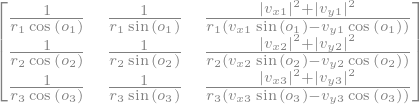

In [9]:
Tra

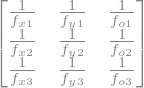

In [12]:
Fs = [[1 / symbols(f'f_x{i}'), 1 / symbols(f'f_y{i}'), 1/ symbols(f'f_o{i}')] for i in range(1, 4)]
Tr = Matrix(Fs)
Tr

In [14]:
Tr.pinv()

KeyboardInterrupt: 

In [16]:
M = Matrix([['a','b','c'],['d','e','f'],['g','h','i']])

In [26]:
i = Tr.inverse_LU()


In [28]:
i.simplify()

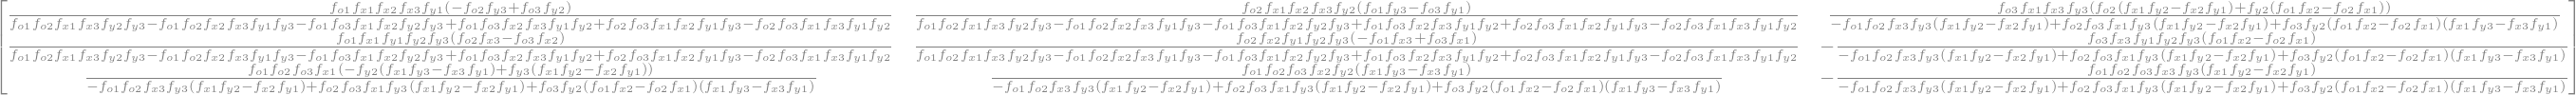

In [29]:
i

In [17]:
M.pinv()

KeyboardInterrupt: 

In [47]:
# TraAdj = Tra.inverse_ADJ()

In [48]:
# sympy.simplify(TraAdj)

In [49]:
simpleInv = sympy.simplify(Tr.inverse_ADJ())

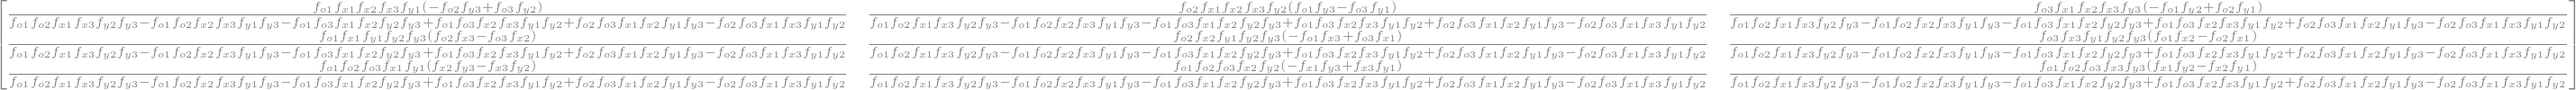

In [50]:
simpleInv

In [51]:
aF_x1, aF_y1, aF_o1 = factors(acfg1)
aF_x2, aF_y2, aF_o2 = factors(acfg2)
aF_x3, aF_y3, aF_o3 = factors(acfg3)

In [52]:
tmp = sympy.simplify(simpleInv.subs(symbols('f_x1'), aF_x1).subs(symbols('f_x2'), aF_x2).subs(symbols('f_x3'), aF_x3))
tmp = tmp.subs(symbols('f_y1'), aF_y1).subs(symbols('f_y2'), aF_y2).subs(symbols('f_y3'), aF_y3).simplify()


In [53]:
tmp = tmp.subs(symbols('f_o1'), aF_o1).subs(symbols('f_o2'), aF_o2).subs(symbols('f_o3'), aF_o3).simplify()

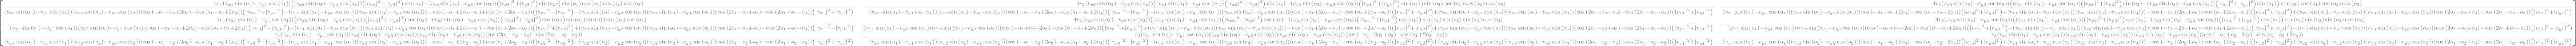

In [54]:
expandedAlg = tmp
expandedAlg

In [73]:
tmp2 = expandedAlg \
    .subs(symbols('r_1'), cfg1.radius_meters) \
    .subs(symbols('r_2'), cfg2.radius_meters) \
    .subs(symbols('r_3'), cfg3.radius_meters) 

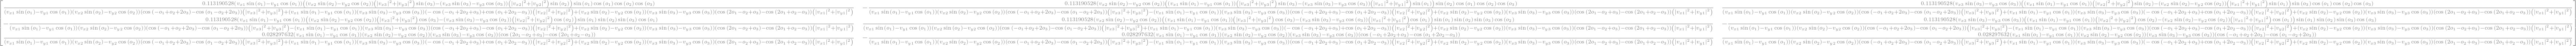

In [74]:
tmp2

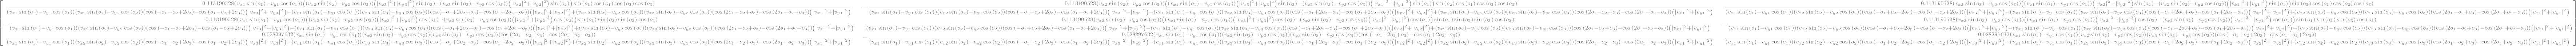

In [72]:
tmp2.simplify()

In [68]:
tmp2 = tmp2 \
    .subs(symbols('o_1'), cfg1.theta_rad) \
    .subs(symbols('o_2'), cfg2.theta_rad) \
    .subs(symbols('o_3'), cfg3.theta_rad)

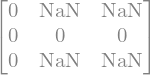

In [69]:
tmp2

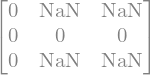

In [57]:
tmp2

In [58]:
transferRealInv = tmp2 \
    .subs(symbols('v_x1'), cfg1.v[0]).subs(symbols('v_y1'), cfg1.v[1]) \
    .subs(symbols('v_x2'), cfg2.v[0]).subs(symbols('v_y2'), cfg2.v[1]) \
    .subs(symbols('v_x3'), cfg3.v[0]).subs(symbols('v_y3'), cfg3.v[1])

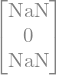

In [59]:
transferRealInv * Matrix([[1],[-1],[0]])

In [60]:
# params = tuple(tuple(f"f_{f}{n}" for f in ['x', 'y', 'o']) for n in range(1, 4))
# inverseMaker = sympy.lambdify(params, simpleInv)

In [61]:
params

NameError: name 'params' is not defined

In [ ]:
params2 = list(list(f"f_{f}{n}" for f in ['x', 'y', 'o']) for n in range(1, 4))
params2[0][1] = symbols('z') - symbols('z')
params2[1][1] = symbols('z') - symbols('z')

Matrix([params2])

/tmp/ipykernel_248120/2698386576.py:5: SymPyDeprecationWarning: 

non-Expr objects in a Matrix is deprecated. Matrix represents
a mathematical matrix. To represent a container of non-numeric
entities, Use a list of lists, TableForm, NumPy array, or some
other data structure instead.

See https://docs.sympy.org/latest/explanation/active-deprecations.html#deprecated-non-expr-in-matrix
for details.

This has been deprecated since SymPy version 1.9. It
will be removed in a future version of SymPy.

  Matrix([params2])


In [ ]:
inverseMaker(factors(cfg1), factors(cfg2), factors(cfg3))

array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=object)